# **JAX Basics: NumPy on Steroids 🦾**

Alright, let's dive into JAX! This section will equip you with the foundational JAX knowledge you'll need for the rest of the practicals. Think of JAX as NumPy's cooler, faster cousin, especially when it comes to machine learning.

**Why JAX?**

JAX is a powerful Python library that turbocharges numerical computation and machine learning.  It's like NumPy but with superpowers:

*   🚀 **Blazing Fast:**  JAX uses just-in-time (JIT) compilation to speed up your code, making it run much faster, especially on GPUs and TPUs. Say goodbye to slow loops!
*   💡 **Automatic Differentiation:**  JAX can automatically calculate gradients of your functions (using `jax.grad`). This is ESSENTIAL for training neural networks and other ML models, and JAX makes it super easy!
*   ✨ **Auto-vectorization & Parallelization:**  JAX can automatically vectorize and parallelize your code across multiple cores or devices (GPUs, TPUs) with minimal effort (using `jax.vmap` and `jax.pmap`).

We'll explore these superpowers in this section!

<details>
  <summary>Dive Deeper: What is JAX Under the Hood?</summary>
  <p>
      JAX achieves its magic by combining two key technologies:
      
      *   **Autograd:**  For automatic differentiation (calculating gradients).
      *   **XLA (Accelerated Linear Algebra):** For just-in-time compilation and efficient execution, especially on accelerators like GPUs and TPUs.
      
      These technologies allow JAX to perform numerical computations with incredible speed and flexibility. JAX encourages a **functional programming style**, where functions are pure and transformations are composable, leading to cleaner and more efficient code.
  </p>
  <p>
      While JAX is lower-level than libraries like PyTorch or TensorFlow, its simplicity and powerful primitives make it a favorite for research and for building custom ML systems. For building neural networks, JAX is often used with higher-level libraries like Flax or Haiku, which provide more structure and convenience.
  </p>
</details>

## 2.1 JAX ❤️ NumPy: A Happy Family (10 minutes)

Good news! If you already know NumPy, you're in great shape to learn JAX. JAX NumPy (`jax.numpy` or `jnp`) is very similar to NumPy. Most of the NumPy functions you're familiar with work the same way in JAX!

Let's explore the similarities and differences.

### Similarities ✅: NumPy Comfort in JAX

JAX NumPy aims to be a drop-in replacement for NumPy for many common operations. Let's see some examples:

In [ ]:
import numpy as np
import jax.numpy as jnp

def print_comparison(title, np_result, jax_result):
    print(f"\n**{title}**") # Markdown formatting for titles!
    print("=" * 40)
    print(f"NumPy: {np_result}")
    print(f"JAX:   {jax_result}")
    print("-" * 40)

# Create arrays for use in examples
np_array1, np_array2 = np.array([1, 2, 3]), np.array([4, 5, 6])
jax_array1, jax_array2 = jnp.array([1, 2, 3]), jnp.array([4, 5, 6])


**Element-wise Addition**
NumPy: [5 7 9]
JAX:   [5 7 9]
----------------------------------------


#### ➕ Element-wise Addition: `+`



In [ ]:
np_add = np_array1 + np_array2
jax_add = jax_array1 + jax_array2
print_comparison("Element-wise Addition", np_add, jax_add)


**Element-wise Addition**
NumPy: [5 7 9]
JAX:   [5 7 9]
----------------------------------------


#### 🔪 Indexing and Slicing: `[]`

Accessing parts of an array using indices and slices is the same:

In [ ]:
np_slice = np_array1[1:4] # Get elements from index 1 up to (but not including) 4
jax_slice = jax_array1[1:4]
print_comparison("Array Slicing", np_slice, jax_slice)


**Array Slicing**
NumPy: [2 3]
JAX:   [2 3]
----------------------------------------


#### ➡️ Array Concatenation: `.concatenate`

Combining arrays is also familiar:

In [ ]:
np_concat = np.concatenate([np_array1, np_array2])
jax_concat = jnp.concatenate([jax_array1, jax_array2])
print_comparison("Array Concatenation", np_concat, jax_concat)


**Array Concatenation**
NumPy: [1 2 3 4 5 6]
JAX:   [1 2 3 4 5 6]
----------------------------------------


#### ✖️ Matrix Multiplication: `.dot`

Matrix multiplication works the same way for linear algebra operations:

In [ ]:
# Create matrices for example
np_matrix = np.array([[1, 2], [3, 4]])
jax_matrix = jnp.array([[1, 2], [3, 4]])

np_matmul = np.dot(np_matrix, np_matrix)
jax_matmul = jnp.dot(jax_matrix, jax_matrix)
print_comparison("Matrix Multiplication", np_matmul, jax_matmul)


**Matrix Multiplication**
NumPy: [[ 7 10]
 [15 22]]
JAX:   [[ 7 10]
 [15 22]]
----------------------------------------


#### 🧮 Mathematical Operations: `.sin`, `.mean`, etc.

Many mathematical functions like `sin`, `cos`, `exp`, `mean`, `sum`, etc., are also available in JAX NumPy and behave similarly to their NumPy counterparts:

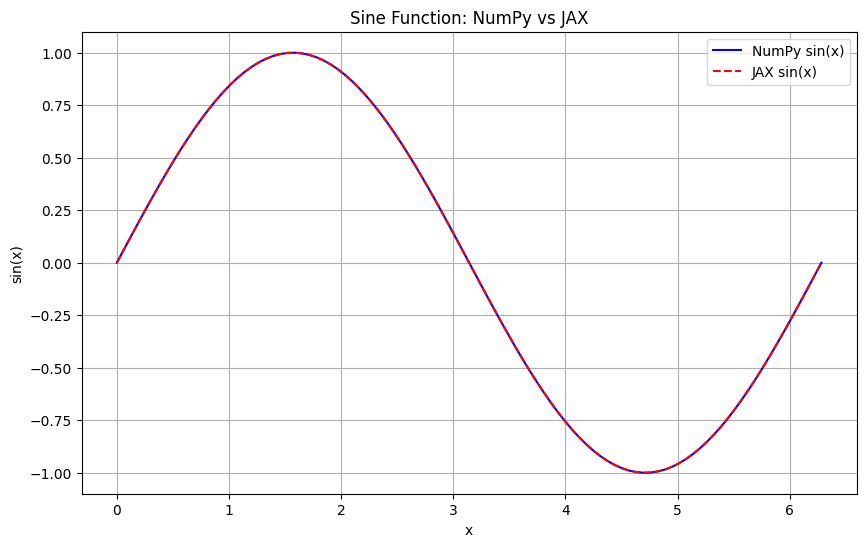

In [ ]:
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(0, 2*np.pi, 100)

# Calculate sine using NumPy
y_np = np.sin(x)

# Calculate sine using JAX
y_jax = jnp.sin(x)

# Plotting (same plotting code for both)
plt.figure(figsize=(10, 6))
plt.plot(x, y_np, label='NumPy sin(x)', color='blue')
plt.plot(x, y_jax, label='JAX sin(x)', color='red', linestyle='--')
plt.title('Sine Function: NumPy vs JAX')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)
plt.show()

### Differences ❌: Where JAX and NumPy Diverge

While JAX NumPy is designed to be very similar to NumPy, there are some key differences you need to be aware of, especially when writing ML code.

#### 1. 🚫 Immutability: JAX Arrays Can't Be Changed in Place

Unlike NumPy arrays, JAX arrays are **immutable**. This means once you create a JAX array, you cannot modify its values directly.  Trying to change an element in-place will raise an error.

Let's see what happens when we try to change the first element of a NumPy array:

In [ ]:
# NumPy: Mutable Arrays (Changes are allowed)
x_np = np.arange(10)
print(f"Original NumPy array: {x_np}")

# Change the first element of x_np
x_np[0] = 10  # In-place modification - this works!
print(f"Modified NumPy array: {x_np}") # NumPy array is changed

Original NumPy array: [0 1 2 3 4 5 6 7 8 9]
Modified NumPy array: [10  1  2  3  4  5  6  7  8  9]


Now, let's try the same with a JAX array:

In [ ]:
# JAX: Immutable Arrays (Changes are NOT allowed)
try:
    x_jax = jnp.arange(10)
    print(f"Original JAX array: {x_jax}")
    x_jax[0] = 10  # In-place modification - this will cause an error!
except Exception as e:
    print(f"Error: {e}") # JAX array remains unchanged

Original JAX array: [0 1 2 3 4 5 6 7 8 9]
Error: '<class 'jaxlib.xla_extension.ArrayImpl'>' object does not support item assignment. JAX arrays are immutable. Instead of ``x[idx] = y``, use ``x = x.at[idx].set(y)`` or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html


See? It fails!  JAX throws an error because it doesn't allow in-place modifications.

**Updating JAX Arrays Immutably:**

To update JAX arrays, you use special "functional update" methods like `.at[index].set(value)`. These methods don't modify the original array; instead, they return a *new*, updated copy of the array.

In [ ]:
x_jax = jnp.arange(10)
print(f"Original JAX array:  {x_jax}")

new_x_jax = x_jax.at[0].set(10) # Creates a *new* array with the change
print(f"New JAX array (modified): {new_x_jax}") # 'new_x_jax' is modified
print(f"Original JAX array (unchanged): {x_jax}") # 'x_jax' is still the same

Original JAX array:  [0 1 2 3 4 5 6 7 8 9]
New JAX array (modified): [10  1  2  3  4  5  6  7  8  9]
Original JAX array (unchanged): [0 1 2 3 4 5 6 7 8 9]


**Key Takeaway:**  Remember to use functional updates like `.at[].set()` when you need to modify JAX arrays. Functional programming is a core principle in JAX and enables its powerful transformations.

#### 2. 🎲 Explicit Randomness: JAX Makes You Manage Randomness

JAX handles random number generation differently than NumPy. In JAX, randomness is **explicit**.  You need to manage random "keys" to control random number generation, making your code more reproducible and predictable.

Let's compare NumPy's implicit randomness to JAX's explicit approach.

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import random

# NumPy: Implicit Randomness (Global Seed)
np.random.seed(0) # Set seed globally
np_rand = np.random.rand(3) # Generate random numbers
print(f"NumPy Random: {np_rand}")

# JAX: Explicit Randomness (Using Keys)
key = random.PRNGKey(0) # Create a random key
jax_rand = random.uniform(key, (3,)) # Pass key to random function
print(f"JAX Random:   {jax_rand}")

NumPy Random: [0.5488135  0.71518937 0.60276338]
JAX Random:   [0.9653214  0.31468165 0.63302994]


**Explanation:**

*   **NumPy:** NumPy uses a global random number generator. You set the seed once using `np.random.seed()`, and subsequent calls to NumPy random functions will use that seed implicitly.
*   **JAX:** JAX uses explicit random keys. You create a key using `random.PRNGKey()` and then explicitly pass that key to each JAX random function (like `random.uniform`).

**Generating Multiple Sets of Random Numbers in JAX:**

If you need multiple sets of independent random numbers in JAX, you must **split** the key each time you need randomness. This ensures that each random operation gets a fresh, independent source of randomness.

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import random

# NumPy: Multiple Random Sets (Implicit - can be less reproducible in complex code)
np.random.seed(0)
np_rand_set1 = np.random.rand(3)
np_rand_set2 = np.random.rand(3)
print(f"NumPy Random Set 1: {np_rand_set1}")
print(f"NumPy Random Set 2: {np_rand_set2}")

# JAX: Multiple Random Sets (Explicit and Reproducible)
key = random.PRNGKey(0)

# Split the key to get two independent subkeys
key, subkey1 = random.split(key) # key is updated!
key, subkey2 = random.split(key) # key is updated again!

jax_rand_set1 = random.uniform(subkey1, (3,)) # Use subkey1
jax_rand_set2 = random.uniform(subkey2, (3,)) # Use subkey2

print(f"JAX Random Set 1:   {jax_rand_set1}")
print(f"JAX Random Set 2:   {jax_rand_set2}")

NumPy Random Set 1: [0.5488135  0.71518937 0.60276338]
NumPy Random Set 2: [0.54488318 0.4236548  0.64589411]
JAX Random Set 1:   [0.87241435 0.11105156 0.27708054]
JAX Random Set 2:   [0.47366    0.5662228  0.88060236]


**Key Takeaway:** JAX's explicit randomness with keys might seem a bit more verbose at first, but it's crucial for reproducibility, especially in complex ML experiments. It gives you fine-grained control over random number generation.

If you want to delve deeper into JAX's random number generation, check out the resources mentioned earlier or the [official JAX documentation on randomness](https://jax.readthedocs.io/en/latest/jax-101/05-random-numbers.html).

## 2.2 Core JAX Primitives: `jit` and `grad` (10 minutes)

Now, let's explore two of JAX's most powerful features (primitives): `jit` and `grad`. These are the building blocks for writing high-performance ML code in JAX.

### `jit` - Speed Boost with Just-In-Time Compilation 🚀

**`jax.jit`** (Just-In-Time compilation) is your secret weapon for making JAX code run FAST. It compiles and caches your Python functions, so they execute super-efficiently using XLA, especially on accelerators like GPUs and TPUs.

**How `jit` Works:**

`jit` takes your Python function and transforms it into a compiled version that's optimized for your hardware. The first time you run a jitted function, JAX compiles it (this might take a bit longer initially). But subsequent calls are much faster because JAX reuses the compiled version from the cache.

In [ ]:
import jax
import jax.numpy as jnp
import time

# Define a simple function
def matmul_sum(a, b):
    matmul =  jnp.matmul(a, b)
    sum = jnp.sum(matmul, axis=0)
    return sum

# JIT compile the function
fast_add = jax.jit(matmul_sum)

# Example arrays
N = 5
x = jnp.arange(N**2).reshape(N,N)
y = jnp.arange(N**2).reshape(N,N) + N**2

# --- Timing Comparison ---

print("--- Without JIT --- ")
start_time = time.time()
result_slow = matmul_sum(x, y)
end_time = time.time()
print(f"Result: {result_slow}")
print(f"Time taken (no jit): {end_time - start_time:.4f} seconds\n")

print("--- With JIT --- ")
result_fast = fast_add(x, y) # First call - compilation happens here

start_time = time.time()
result_fast = fast_add(x, y) # Subsequent calls are faster
end_time = time.time()
print(f"Result: {result_fast}")
print(f"Time taken (jit): {end_time - start_time:.4f} seconds")

--- Without JIT --- 
Result: [10750 11050 11350 11650 11950]
Time taken (no jit): 0.0011 seconds

--- With JIT --- 
Result: [10750 11050 11350 11650 11950]
Time taken (jit): 0.0001 seconds


**Observe the speed difference!** The jitted version runs much faster, especially on subsequent calls, thanks to compilation and caching.

**Important Note:**  `jit` works best with **pure functions**. Pure functions are functions that:

*   Always return the same output for the same inputs (no side effects).
*   Don't rely on or modify any external state outside their scope.

JAX functions are generally expected to be pure and functional for best performance and predictability.

### `grad` - Automatic Differentiation: Your ML Superpower ✨

**`jax.grad`** is the automatic differentiation (autodiff) workhorse in JAX. It lets you compute gradients of Python and NumPy functions with ease. Gradients are the heart of training ML models, and JAX makes calculating them a breeze!

**How `grad` Works:**

`grad(f)` takes a function `f` as input and returns a *new* function that computes the gradient of `f`. If `f` is a mathematical function \(f\), then `grad(f)` is like its derivative \(f'\). Calling `grad(f)(x)` gives you the gradient of \(f\) evaluated at point \(x\).

In [ ]:
import jax
import jax.numpy as jnp

# Define a function (e.g., square function)
def square(x):
    return x ** 2

# Get the gradient function using jax.grad
grad_square = jax.grad(square)

# Evaluate the gradient at x = 3.0
x = 3.0
gradient_at_x = grad_square(x)
print(f"Gradient of square(x) at x = {x}: {gradient_at_x}") # Should be close to 6.0

Gradient of square(x) at x = 3.0: 6.0


**Intuition:** Gradients tell you the direction of the steepest ascent of a function. In ML, we use gradients to find the direction to *minimize* our loss function (error). Gradient descent and related optimization algorithms use gradients to iteratively update model parameters and reduce loss.

**Key Takeaway:** `jax.grad` is incredibly powerful. It allows you to automatically compute gradients of even complex Python functions, which is essential for training neural networks without manual differentiation!

## 2.3 Auto-vectorization - `vmap` (Bonus - Optional, 5 minutes)

**`jax.vmap`** (Vectorizing Map) is another JAX superpower. It automatically vectorizes your functions, allowing you to efficiently apply a function to batches of data without writing explicit loops. This is crucial for performance in ML, where we often process data in batches.

**Example: Vectorizing the `square` function:**

In [ ]:
import jax
import jax.numpy as jnp

# Our simple square function (operates on a single number)
def square(x):
    return x ** 2

# Vectorize 'square' to work on batches using vmap
vectorized_square = jax.vmap(square) # Create a batched version

# Input batch of numbers
x_batch = jnp.array([1.0, 2.0, 3.0])

# Apply vectorized function to the batch
squared_batch = vectorized_square(x_batch)
print(f"Squared batch: {squared_batch}")

Squared batch: [1. 4. 9.]


**`vmap` Magic:** `vmap(square)` takes the `square` function (which works on single numbers) and automatically creates `vectorized_square`, which can now process entire batches (arrays) of numbers efficiently.

**Benefit:** Without `vmap`, you'd have to write explicit loops to process batches, which is slower and less concise. `vmap` does the looping (vectorization) for you under the hood, making your code cleaner and faster.

**Key Takeaway:** `jax.vmap` is your friend for efficient batch processing in JAX. It eliminates the need for manual loops and leverages JAX's performance optimizations.

### 🎉 Congratulations! You've Mastered JAX Basics!

You've now got a solid foundation in JAX, covering:

*   NumPy Compatibility
*   Immutability (and functional updates)
*   Explicit Randomness with Keys
*   `jit` for Speed
*   `grad` for Automatic Differentiation
*   `vmap` for Auto-vectorization (Bonus)

With these JAX primitives in your toolkit, you're well-prepared to tackle more advanced ML tasks in the following practicals. Let's move on to Part 3 to build and train your first neural network!

## 2.4 **Advanced:** Building and Training a Neural Network in JAX with Flax (20 minutes) ⏰

Let's put our JAX knowledge to work and build a simple neural network for classification! We'll use Flax, a popular neural network library for JAX, to make things easier. We'll train this network to classify handwritten digits from the MNIST dataset.

In [ ]:
import flax.linen as nn
import jax
import jax.numpy as jnp

# download Mnist and store it at ~/scikit_learn_data for offline use
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### 🧱 Define the Neural Network Architecture with Flax Linen **[exercise]**

We'll create a simple feedforward neural network with two hidden layers using Flax Linen's `nn.Module`.

In [ ]:
class SimpleClassifier(nn.Module):
    num_classes: int # Output size - number of classes for classification

    @nn.compact # Linen decorator to indicate compact module definition
    def __call__(self, x): # Flax modules are classes with a __call__ method
        # Flatten the input image to a vector (784 features)
        x = x.reshape((x.shape[0], -1)) # [batch_size, 28*28]

        # Hidden layer 1: Dense (linear) layer followed by ReLU activation
        x = nn.Dense(features=128)(x) # Linear transformation
        x = nn.relu(x) # Apply ReLU activation function

        # Hidden layer 2: Another Dense layer with ReLU
        x = # ... your code here
        x = # ... your code here

        # Output layer: Dense layer to produce logits for each class
        x = nn.Dense(features=self.num_classes)(x) # Linear layer, no activation
        return x # Output logits (unnormalized probabilities)

**Explanation:**

*   **`class SimpleClassifier(nn.Module):`**: We define our neural network as a class inheriting from `flax.linen.Module`.
*   **`num_classes: int`**: This line defines a "parameter" for our module, specifying the number of output classes (10 for MNIST digits).
*   **`@nn.compact`**: This decorator tells Flax Linen to optimize the module definition for conciseness.
*   **`def __call__(self, x):`**: The `__call__` method defines the forward pass of our network. It takes the input `x` (an image batch) and processes it through the layers.
*   **`x = x.reshape(...)`**: We flatten the 28x28 images into vectors of size 784, suitable as input to dense layers.
*   **`nn.Dense(features=...)`**: These are fully connected (dense) layers. Each `nn.Dense` layer performs a linear transformation (matrix multiplication and bias addition).
*   **`nn.relu(x)`**:  ReLU (Rectified Linear Unit) activation function is applied after each hidden dense layer to introduce non-linearity.
*   **Output Layer:** The final `nn.Dense(features=self.num_classes)` layer produces the output logits. **No activation function is applied here** because we want the raw logits as input to our loss function (cross-entropy).

### ⚙️ Initialize Parameters

Before training, we need to initialize our model's parameters (weights and biases). We'll use Flax's `model.init` to do this.

Note `model.init` takes an example input to figure out the internal shapes and computational graph of the model:

In [ ]:
input_shape = (-1, 28, 28, 1) # Shape of MNIST images (batch_size, height, width, channels)
num_classes = 10 # MNIST digits 0-9
model = SimpleClassifier(num_classes=num_classes) # Create an instance of our model

key = jax.random.PRNGKey(0) # Random key for initialization
dummy_input = jnp.ones(input_shape) # Dummy input with the correct shape

# Initialize parameters (variables in Flax)
initial_params = model.init(key, dummy_input) # Get initial parameter values

print(initial_params) # Print the initialized parameters (nested dictionary)

**Explanation:**

*   **`input_shape = (-1, 28, 28, 1)`**: We define the expected shape of our input images. The `-1` indicates a batch dimension (which can be of any size), followed by image dimensions (28x28 pixels) and channels (1 for grayscale).
*   **`model = SimpleClassifier(num_classes=num_classes)`**: We create an instance of our `SimpleClassifier` model, telling it we have 10 output classes.
*   **`key = jax.random.PRNGKey(0)`**: We create a random key for parameter initialization.
*   **`dummy_input = jnp.ones(input_shape)`**: We create a dummy input tensor with the correct shape. JAX needs this to infer the shapes of the weights and biases in our network.
*   **`initial_params = model.init(key, dummy_input)`**: This is where the magic happens! `model.init` uses the random key and dummy input to initialize the parameters of our network. The result, `initial_params`, is a nested dictionary containing the weights and biases for each layer.

### 🔮 Define the Forward Pass (Prediction) Function  **[exercise]**

Now, let's create a function for making predictions with our model. This function will take the parameters and input data and run the forward pass through the network:

In [ ]:
# Define the forward pass function
def forward_pass(params, x):
    logits = model.apply(params, x) # Apply the model, get logits
    # Convert logits to probabilities using softmax.
    # Hint: use nn.softmax, pay attention to which axis to compute softmax over
    probs = # ... your code here
    return probs # Return probability distribution over classes


#### Explanation: (try not to peek)



*   **`def forward_pass(params, x):`**: This function takes the model parameters (`params`) and input data (`x`) as arguments.
*   **`logits = model.apply(params, x)`**: We use `model.apply` to perform the forward pass through our network, using the provided parameters and input `x`. This gives us the raw output of the network, called "logits".
*   **`probs = nn.softmax(logits, axis=-1)`**: We apply the softmax function to the logits to convert them into probabilities. Softmax ensures that the outputs sum to 1 and represent a valid probability distribution across the classes. `axis=-1` applies softmax along the class dimension.


### 📉 Define the Loss Function

We'll use the cross-entropy loss, which is commonly used for multi-class classification. We'll also define a function to calculate accuracy, which is a more interpretable metric for evaluating our classifier.

In [ ]:
# Loss function (Cross-entropy loss for classification)
def cross_entropy_loss(params, x_batch, y_batch):
    probs = forward_pass(params, x_batch) # Get predictions (probabilities)
    log_probs = jnp.log(probs) # Take the logarithm of probabilities
    one_hot_targets = jax.nn.one_hot(y_batch, num_classes=num_classes) # One-hot encode targets
    return -jnp.mean(jnp.sum(one_hot_targets * log_probs, axis=-1)) # Cross-entropy loss

# Accuracy metric
def accuracy(params, x_batch, y_batch):
    preds = forward_pass(params, x_batch) # Get predictions
    predicted_classes = jnp.argmax(preds, axis=-1) # Get class with highest probability
    return jnp.mean(predicted_classes == y_batch) # Calculate accuracy

**Explanation:**

*   **`cross_entropy_loss(params, x_batch, y_batch)`**: This function calculates the cross-entropy loss for a batch of data.
    *   It uses `forward_pass` to get the probability predictions from our model.
    *   It converts the integer labels `y_batch` into one-hot encoded vectors using `jax.nn.one_hot`.
    *   It computes the cross-entropy loss using standard formulas and returns the *mean* loss over the batch.
*   **`accuracy(params, x_batch, y_batch)`**: This function calculates the accuracy of our model on a batch of data.
    *   It uses `forward_pass` to get predictions.
    *   `jnp.argmax(preds, axis=-1)`:  Finds the class with the highest probability for each sample in the batch (giving us the predicted class labels).
    *   `jnp.mean(predicted_classes == y_batch)`:  Compares the predicted classes to the true labels (`y_batch`) and calculates the mean accuracy (fraction of correct predictions).

### 🏋️‍♀️ Define the Training Loop (using Gradient Descent)

Now we'll write the training loop using gradient descent to optimize our model parameters.

We'll use `jax.value_and_grad`, which is similar to `jax.grad` but returns the value of the function together with the grad, and `jax.jit` to speed up the training step.

In [ ]:
def train_step(params, x_batch, y_batch, learning_rate):
    """Performs one training step (parameter update)."""
    loss_val, grads = jax.value_and_grad(cross_entropy_loss)(params, x_batch, y_batch) # Loss and gradients
    params_updated = jax.tree_map( # Update parameters using gradient descent
        lambda p, g: p - learning_rate * g, params, grads
    )
    return loss_val, params_updated # Return updated parameters & loss value

# JIT-compile the train_step for speed!
train_step_jitted = jax.jit(train_step)

**Explanation:**

*   **`def train_step(params, x_batch, y_batch, learning_rate):`**: This function defines a single training step.
    *   **`loss_val, grads = jax.value_and_grad(...)`**:  We use `jax.value_and_grad(cross_entropy_loss)` to efficiently compute both the loss value and the gradients of the loss function *with respect to the parameters*.
    *   **`params_updated = jax.tree_map(...)`**: We update the model parameters using gradient descent:  `new_params = old_params - learning_rate * gradients`. `jax.tree_map` is used to apply this update to each parameter in our nested parameter dictionary.
    *   The function returns the loss value and the updated parameters.
*   **`train_step_jitted = jax.jit(train_step)`**: We JIT-compile the `train_step` function using `jax.jit`. This will significantly speed up our training loop.

### 🚄 Run the Training Loop

Now we have all the pieces to train our neural network! Let's put it all together in a training loop:

In [ ]:
num_epochs = 10
batch_size = 128
learning_rate = 0.01

params = initial_params # Start with initial parameters
train_losses = [] # To keep track of training loss over epochs
val_accuracies = [] # To keep track of validation accuracy over epochs

for epoch in range(num_epochs):
    start_time = time.time() # Track epoch time
    num_train_batches = X_train.shape[0] // batch_size
    epoch_loss = [] # Store loss for each batch in an epoch

    # Iterate through training batches
    for batch_idx in range(num_train_batches):
        batch_start = batch_idx * batch_size
        batch_end = batch_start + batch_size
        x_batch = X_train[batch_start:batch_end]
        y_batch = y_train[batch_start:batch_end]

        loss_val, params = train_step_jitted( # Call JIT-compiled train step
            params, x_batch, y_batch, learning_rate
        )
        epoch_loss.append(loss_val) # Store batch loss

    # Calculate average loss over batches for the epoch
    train_loss_epoch = jnp.mean(jnp.array(epoch_loss))
    train_losses.append(train_loss_epoch) # Store epoch loss

    # Calculate validation accuracy at the end of each epoch
    val_accuracy = accuracy(params, X_test, y_test)
    val_accuracies.append(val_accuracy)

    epoch_time = time.time() - start_time # Epoch duration
    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {train_loss_epoch:.4f} | Val Acc: {val_accuracy:.4f} | Time: {epoch_time:.2f}s")

# --- Plotting --- #

# Plotting training loss curve
plt.figure(figsize=(10, 4))
plt.plot(train_losses)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

# Plotting validation accuracy curve
plt.figure(figsize=(10, 4))
plt.plot(val_accuracies)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Curve")
plt.grid(True)
plt.show()

**Explanation:**

*   **Hyperparameters:** We set hyperparameters like `num_epochs`, `batch_size`, and `learning_rate`.
*   **Initialization:** We start with our `initial_params`.
*   **Epoch Loop:** The outer loop iterates through the training epochs.
    *   **Batch Iteration:** The inner loop iterates through the training data in batches (mini-batch gradient descent).
    *   **`train_step_jitted(...)`**: We call our JIT-compiled `train_step` function to compute the loss and gradients and update parameters for each batch.
    *   **Loss and Accuracy Tracking:** We keep track of the training loss and validation accuracy after each epoch for plotting.
*   **Plotting:** After training, we plot the training loss and validation accuracy curves to visualize the training progress.

### 🎯 Congrats! You've Trained a Neural Network in JAX!

You've successfully built and trained a simple neural network for multi-class classification using JAX and Flax! This notebook covered a lot of ground:

*   Understanding JAX's core primitives (`jit`, `grad`, `vmap`)
*   Building a neural network with Flax Linen
*   Implementing loss and accuracy metrics
*   Writing a training loop with gradient descent

This is a significant step in your JAX and ML journey. In the next practicals, we'll build upon these fundamentals and explore more advanced deep learning models and techniques.

## 2.5 **[Extra] Introducing Optax: Gradient Processing and Optimization in JAX** (10 minutes) ⏰

So far, we've used basic gradient descent to update our model parameters. But in modern machine learning, we often need more sophisticated optimization algorithms like Adam or Momentum to train models effectively and efficiently. Enter **Optax**, a powerful library built for JAX that provides gradient processing and optimization tools!

**What is Optax?**

Optax is a gradient processing and optimization library designed to work seamlessly with JAX. It offers:

*   🛠️ **Flexible Optimizers:** A variety of optimization algorithms like SGD (Stochastic Gradient Descent), Adam, RMSprop, and more, with customizable parameters.
*   🔄 **Gradient Transformations:** Tools to manipulate gradients (e.g., clipping, scaling) before applying updates.
*   🌟 **Composability:** The ability to chain multiple transformations together (e.g., combining gradient clipping with an optimizer).
*   ⚡ **JAX Compatibility:** Fully integrates with JAX's functional programming model and JIT compilation for high performance.

In this section, we'll modify our training loop to use Optax's Adam optimizer instead of plain gradient descent, giving our neural network a boost in training efficiency!

### Why Use Optax?

While our basic gradient descent implementation works, it has limitations:

*   **Fixed Step Size:** Gradient descent uses a constant learning rate, which can lead to slow convergence or overshooting.
*   **No Momentum:** It doesn’t account for the history of gradients, potentially causing inefficient updates.

Optax optimizers like Adam adapt the learning rate for each parameter based on past gradients, often leading to faster and more stable training. Let’s see how to integrate Optax into our workflow.

### Installing Optax

First, ensure Optax is installed in your Colab environment. Run the following cell to install it if needed:

In [ ]:
!pip install optax
import optax

### Using Optax with Our Neural Network

Let’s update our training step to use Optax’s Adam optimizer instead of basic gradient descent. We'll integrate it into the `train_step` function we defined earlier.

In [ ]:
import jax
import jax.numpy as jnp
import optax

# Define the updated training step with Optax
def train_step_optax(params, opt_state, x_batch, y_batch, optimizer):
    """Performs one training step using an Optax optimizer.

    Args:
        params: Model parameters.
        opt_state: Optimizer state (e.g., momentum, moving averages).
        x_batch: Input batch.
        y_batch: Target batch.
        optimizer: Optax optimizer instance.

    Returns:
        loss_val: Loss value for the batch.
        params_updated: Updated model parameters.
        opt_state_updated: Updated optimizer state.
    """
    # Compute loss and gradients
    loss_val, grads = jax.value_and_grad(cross_entropy_loss)(params, x_batch, y_batch)
    # Compute parameter updates using the optimizer
    updates, opt_state_updated = optimizer.update(grads, opt_state, params)
    # Apply updates to parameters
    params_updated = optax.apply_updates(params, updates)
    return loss_val, params_updated, opt_state_updated

# JIT-compile the training step for speed
train_step_optax_jitted = jax.jit(train_step_optax)

**Explanation:**

*   **`train_step_optax`**: This updated function now takes an `opt_state` (optimizer state) and an `optimizer` instance as arguments, in addition to the previous inputs.
    *   **`loss_val, grads = jax.value_and_grad(...)`**: Same as before, we compute the loss and gradients of the loss with respect to the parameters.
    *   **`updates, opt_state_updated = optimizer.update(...)`**: The Optax optimizer computes the updates to the parameters based on the gradients and its internal state (e.g., moving averages in Adam). It also returns the updated optimizer state.
    *   **`params_updated = optax.apply_updates(...)`**: Apply the computed updates to the parameters to get the new parameter values.
    *   **Returns**: We return the loss, updated parameters, and updated optimizer state.
*   **`train_step_optax_jitted = jax.jit(...)`**: We JIT-compile this function for performance gains, just like before.

### Update the Training Loop with Optax

Now let's modify our training loop to use the Optax-based training step. We'll initialize an Adam optimizer and manage its state during training.

In [ ]:
import matplotlib.pyplot as plt
import time

# Hyperparameters
num_epochs = 10
batch_size = 128
learning_rate = 0.001  # Adjusted for Adam (typically smaller than basic GD)

# Initialize the optimizer (Adam)
optimizer = optax.adam(learning_rate=learning_rate)
opt_state = optimizer.init(initial_params)  # Initialize optimizer state with initial parameters

# Training loop with Optax
params = initial_params  # Start with initial parameters
train_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    start_time = time.time()
    num_train_batches = X_train.shape[0] // batch_size
    epoch_loss = []

    # Iterate through training batches
    for batch_idx in range(num_train_batches):
        batch_start = batch_idx * batch_size
        batch_end = batch_start + batch_size
        x_batch = X_train[batch_start:batch_end]
        y_batch = y_train[batch_start:batch_end]

        # Perform training step with Optax
        loss_val, params, opt_state = train_step_optax_jitted(
            params, opt_state, x_batch, y_batch, optimizer
        )
        epoch_loss.append(loss_val)

    # Calculate average loss for the epoch
    train_loss_epoch = jnp.mean(jnp.array(epoch_loss))
    train_losses.append(train_loss_epoch)

    # Calculate validation accuracy
    val_accuracy = accuracy(params, X_test, y_test)
    val_accuracies.append(val_accuracy)

    epoch_time = time.time() - start_time
    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {train_loss_epoch:.4f} | Val Acc: {val_accuracy:.4f} | Time: {epoch_time:.2f}s")

# Plot training loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve with Optax (Adam)")
plt.grid(True)
plt.show()

# Plot validation accuracy
plt.figure(figsize=(10, 4))
plt.plot(val_accuracies)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Curve with Optax (Adam)")
plt.grid(True)
plt.show()

**Explanation:**

*   **`optimizer = optax.adam(learning_rate=learning_rate)`**: We create an Adam optimizer with a specified learning rate (typically smaller than basic gradient descent, e.g., 0.001).
*   **`opt_state = optimizer.init(initial_params)`**: Initialize the optimizer’s state (e.g., first and second moment estimates for Adam) based on the initial parameters.
*   **Training Loop Changes**:
    *   We now pass `opt_state` and `optimizer` to `train_step_optax_jitted`.
    *   The function returns the updated `opt_state`, which we reuse in the next iteration to maintain the optimizer’s internal statistics (e.g., momentum).
*   **Performance**: Adam often converges faster and more reliably than basic gradient descent, especially for neural networks, due to its adaptive learning rates.

**Key Differences from Basic GD:**

- Instead of manually subtracting `learning_rate * grads` from parameters, Optax handles the update logic, incorporating momentum and adaptive learning rates.
- We manage an additional `opt_state` object, which tracks optimizer-specific variables.

### Benefits of Optax

*   **Improved Convergence:** Adaptive optimizers like Adam typically converge faster and more stably than basic gradient descent.
*   **Ease of Use:** Switching to a different optimizer (e.g., RMSprop, SGD with momentum) is as simple as changing `optax.adam` to another Optax function.
*   **Customization:** You can chain transformations like gradient clipping (`optax.clip`) or learning rate schedules with minimal code changes.

**Try It Out!** Experiment with different Optax optimizers (e.g., `optax.sgd`, `optax.rmsprop`) or tweak the learning rate to see how they affect training performance.

### 🚀 Wrapping Up

With Optax, you’ve upgraded your JAX training pipeline to use state-of-the-art optimization techniques! This section introduced:

*   The motivation behind Optax and its role in JAX.
*   How to integrate an Optax optimizer into a neural network training loop.
*   The practical benefits of using adaptive optimizers over basic gradient descent.

You’re now equipped to explore more advanced optimization strategies in your ML experiments with JAX and Optax!